In [2]:
import bonesis
import pandas as pd
from colomoto_jupyter import tabulate
bonesis.settings["parallel"] = 1 

# computing graph layout...


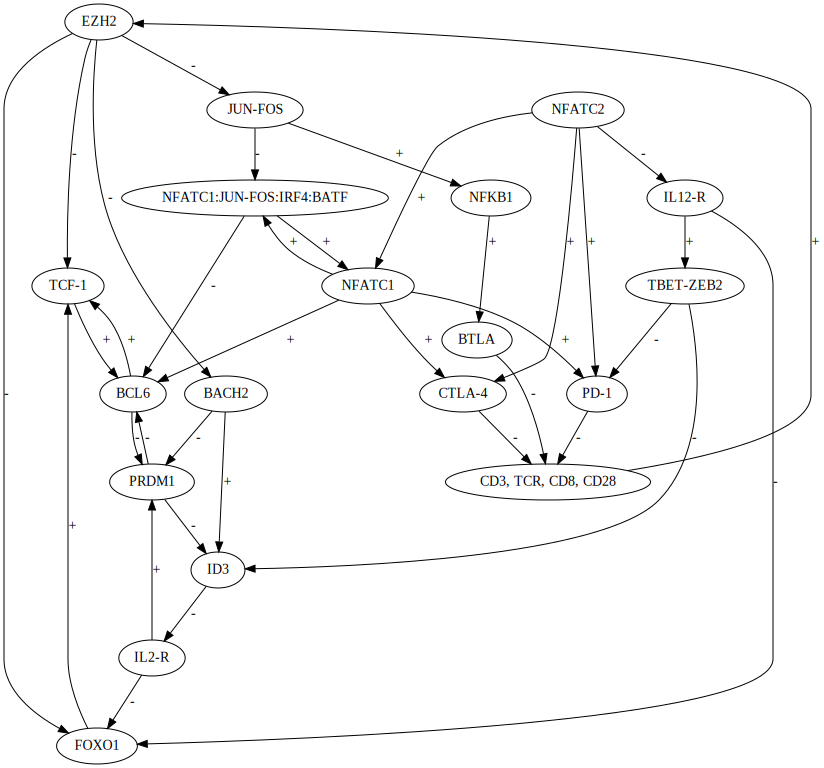

In [3]:
influences = [

("EZH2","TCF-1",dict(sign=-1)),
("EZH2","BACH2",dict(sign=-1)),
("EZH2","FOXO1",dict(sign=-1)),
("PRDM1","BCL6",dict(sign=-1)),
("PRDM1","ID3",dict(sign=-1)),
("BACH2","PRDM1",dict(sign=-1)),
("BACH2","ID3",dict(sign=1)),
("FOXO1","TCF-1",dict(sign=1)),
("ID3","IL2-R",dict(sign=-1)),
("BCL6","PRDM1",dict(sign=-1)),
("BCL6","TCF-1",dict(sign=1)),
("TCF-1","BCL6",dict(sign=1)),
("IL2-R","PRDM1",dict(sign=1)),
("IL2-R","FOXO1",dict(sign=-1)),
("NFATC1:JUN-FOS:IRF4:BATF","BCL6",dict(sign=-1)),
("NFATC1","BCL6",dict(sign=1)),
    
("JUN-FOS","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=-1)),  
("CD3, TCR, CD8, CD28","EZH2",dict(sign=1)),
("CTLA-4","CD3, TCR, CD8, CD28",dict(sign=-1)),
("NFATC1","CTLA-4",dict(sign=1)),
("NFATC1","PD-1",dict(sign=1)),
("NFATC1","NFATC1:JUN-FOS:IRF4:BATF",dict(sign=1)),
("NFATC1:JUN-FOS:IRF4:BATF","NFATC1",dict(sign=1)),
("PD-1","CD3, TCR, CD8, CD28",dict(sign=-1)),
("JUN-FOS","NFKB1",dict(sign=1)), 
("NFKB1","BTLA",dict(sign=1)),
#("NFKB1","BCL6",dict(sign=1)),
("EZH2","JUN-FOS",dict(sign=-1)), 
("BTLA","CD3, TCR, CD8, CD28",dict(sign=-1)),
    
("TBET-ZEB2","PD-1",dict(sign=-1)),
("IL12-R","TBET-ZEB2",dict(sign=1)),
("NFATC2","IL12-R",dict(sign=-1)),
("NFATC2","CTLA-4",dict(sign=1)),
("NFATC2","PD-1",dict(sign=1)),
("NFATC2","NFATC1",dict(sign=1)),

("TBET-ZEB2","ID3",dict(sign=-1)),
("IL12-R","FOXO1",dict(sign=-1)),
#("NFATC2","BCL6",dict(sign=1)),

]


bonesis_toy = bonesis.InfluenceGraph(influences)
bonesis_toy

In [4]:
#Mixture of dotplot and heatmap
observed_states={
    "zero": {"EZH2":0,"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"IL2-R":0,"NFATC1:JUN-FOS:IRF4:BATF":0,"NFATC1":0,"PD-1":0,"BTLA":0,"JUN-FOS":0,"NFKB1":0,"TBET-ZEB2":0,"PRDM1":0,"BACH2":0,"FOXO1":0,"ID3":0,"BCL6":0,"TCF-1":0,"IL12-R":0,"NFATC2":0},
    "trans":{"CD3, TCR, CD8, CD28":0,"CTLA-4":0,"PD-1":0,"FOXO1":0,"IL12-R":0,"NFATC2":0,"JUN-FOS":0,"TBET-ZEB2":1},
    "mem": {"EZH2":0,"NFATC1":1,"NFKB1":1,"PRDM1":0,"BACH2":1,"NFATC2":0,"JUN-FOS":1,"TBET-ZEB2":0},
    "exh": {"EZH2":1,"CD3, TCR, CD8, CD28":1,"CTLA-4":1,"NFATC1":0,"PD-1":1,"NFKB1":0,"PRDM1":1,"FOXO1":1,"IL12-R":1,"NFATC2":1,"JUN-FOS":0},
}
pd.DataFrame.from_dict(observed_states, orient="index").fillna('')


#Has ~500k solutions!

,EZH2,"CD3, TCR, CD8, CD28",CTLA-4,IL2-R,NFATC1:JUN-FOS:IRF4:BATF,NFATC1,PD-1,BTLA,JUN-FOS,NFKB1,TBET-ZEB2,PRDM1,BACH2,FOXO1,ID3,BCL6,TCF-1,IL12-R,NFATC2
zero,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
mem,0.0,,,,,1.0,,,1,1.0,0.0,0.0,1.0,,,,,,0
exh,1.0,1.0,1.0,,,0.0,1.0,,0,0.0,,1.0,,1.0,,,,1.0,1
trans,,0.0,0.0,,,,0.0,,0,,1.0,,,0.0,,,,0.0,0


In [5]:
bo=bonesis.BoNesis(bonesis_toy, observed_states)

bo.fixed(~bo.obs("exh"))

~bo.obs("mem") >= ~bo.obs("trans") >= ~bo.obs("exh");

#~bo.obs("exh") >= ~bo.obs("mem")

#~bo.obs("zero") / ~bo.obs("mem")
#~bo.obs("zero") / ~bo.obs("trans")
~bo.obs("zero") / ~bo.obs("exh");

In [6]:
for bn in bo.boolean_networks(limit=1): # limit is optional
    print(bn)

Grounding...done in 0.1s
BACH2 <- 1
BCL6 <- TCF-1|(NFATC1&!PRDM1)
BTLA <- 0
CD3, TCR, CD8, CD28 <- 1
CTLA-4 <- NFATC1|NFATC2
EZH2 <- 1
FOXO1 <- 1
ID3 <- 0
IL12-R <- 1
IL2-R <- 1
JUN-FOS <- 0
NFATC1 <- 0
NFATC1:JUN-FOS:IRF4:BATF <- 0
NFATC2 <- 1
NFKB1 <- 0
PD-1 <- NFATC2
PRDM1 <- IL2-R
TBET-ZEB2 <- 1
TCF-1 <- BCL6



In [6]:
solutions = list(bo.boolean_networks(limit=100000))
solutions_backup=solutions
pd.DataFrame(solutions)

Grounding...done in 0.2s


,BACH2,BCL6,BTLA,"CD3, TCR, CD8, CD28",CTLA-4,EZH2,FOXO1,ID3,IL12-R,IL2-R,JUN-FOS,NFATC1,NFATC1:JUN-FOS:IRF4:BATF,NFATC2,NFKB1,PD-1,PRDM1,TBET-ZEB2,TCF-1
0,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,0,1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF,0,1,JUN-FOS,NFATC2,!BACH2,1,BCL6
1,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,0,1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,0,1,JUN-FOS,NFATC2,!BACH2,1,BCL6
2,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,0,1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,0,1,JUN-FOS,1,!BACH2,1,BCL6
3,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,NFATC1|NFATC2,"CD3, TCR, CD8, CD28",1,0,1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF,0,1,JUN-FOS,1,!BACH2,1,BCL6
4,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,1,"CD3, TCR, CD8, CD28",1,0,1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,0,1,JUN-FOS,1,!BACH2,1,BCL6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,0,!BTLA,NFATC2,"CD3, TCR, CD8, CD28",1,BACH2|(!PRDM1&!TBET-ZEB2),1,!ID3,!EZH2,NFATC1:JUN-FOS:IRF4:BATF&NFATC2,0,1,JUN-FOS,NFATC1|NFATC2,!BACH2|IL2-R,1,BCL6&FOXO1
99996,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,NFKB1,!BTLA,NFATC2,"CD3, TCR, CD8, CD28",1,(BACH2&!TBET-ZEB2)|(!PRDM1&!TBET-ZEB2),1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF,0,1,JUN-FOS,NFATC1|NFATC2,!BACH2|IL2-R,1,BCL6&FOXO1
99997,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,NFKB1,!BTLA,NFATC2,"CD3, TCR, CD8, CD28",1,BACH2|(!PRDM1&!TBET-ZEB2),1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF,0,1,JUN-FOS,NFATC1|NFATC2,!BACH2|IL2-R,1,BCL6&FOXO1
99998,!EZH2,(NFATC1&NFATC2&!PRDM1&TCF-1)|(!NFATC1:JUN-FOS:...,NFKB1,!BTLA,NFATC2,"CD3, TCR, CD8, CD28",!EZH2|!IL12-R|!IL2-R,(BACH2&!TBET-ZEB2)|(!PRDM1&!TBET-ZEB2),1,0,!EZH2,NFATC1:JUN-FOS:IRF4:BATF,0,1,JUN-FOS,NFATC1|NFATC2,!BACH2|IL2-R,1,BCL6&FOXO1


In [ ]:
n_solutions=[3000000, 5000000, 7000000, 10000000]
for n in n_solutions:
    solutions = list(bo.boolean_networks(limit=n))
    rules=pd.DataFrame(solutions)
    
    repository="/media/ag-cherrmann/ischneider/GRNTcellExh/analysis/bonesis_output/bonesis_toy_rules_"+str(n/1000)+"k.csv"
    rules.to_csv(repository)

Grounding...done in 0.1s
Grounding...done in 0.0s
Grounding...done in 0.0s
Grounding...done in 0.1s
